# Analog vs Digital Tranmission

We will consider the case of transmission over a long cable in which several repeaters are used to compensate for the attenuation introduced by the transmission.

Remember that if each cable segment introduces an attenuation of $1/G$, we can recover the original amplitude by boosting the signal with a repeater with gain $G$. However, if the signal has accumulated additive noise, the noise will be amplified as well so that, after $N$ repeaters, the noise will have been amplified $N$ times:

$$
    \hat{x}_N(t)  = x(t) + NG\sigma(t)
$$

If we use a digital signal, on the other hand, we can threshold the signal after each repeater and virtually eliminate the noise at each stage, so that even after several repeaters the trasmission is still noise-free.

Let's start with the standard initial bookkeeping...

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from IPython.display import Audio
from scipy.io import wavfile

In [17]:
plt.rcParams["figure.figsize"] = (14,4)

Now we can read in an audio file from disk; we can plot it and play it back. The wavfile.read() function returns the audio data and the playback rate, which we will need to pass to the playback functions.

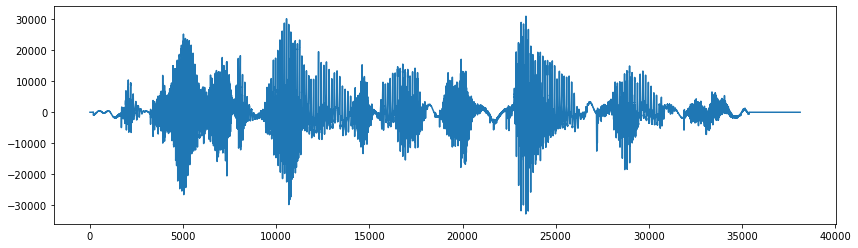

In [18]:
rate, s = wavfile.read('sample.wav')
plt.plot(s)
Audio(s, rate=rate)

# Analog and Digital signal

Two versions, analog and digitial will be created.

In [19]:
# The analog signal is rescaled between -100 and +100
norm = 1.0 / max(np.absolute([min(s), max(s)]))
sAnalog = 100.0 * s * norm

# digital version is clamped to the integers
sDigital = np.round(sAnalog)

Quantization implies a loss of quality; this initial loss (that can be minimize by using more bits per sample) is the price to pay for digital transmission. We can plot the error and compute the Signal to Noise Ratio (SNR) of the quantized signal

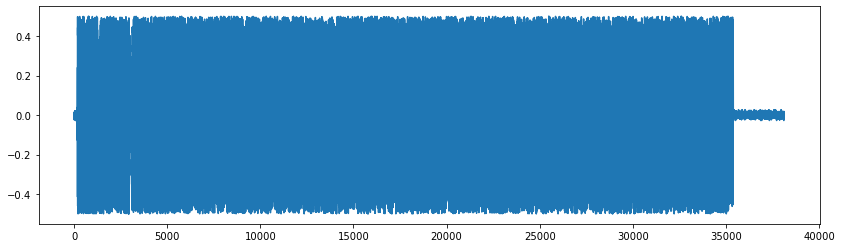

In [20]:
plt.plot(sAnalog - sDigital);

As expected, the error lies between -0.5 and +0.5 as the analog signal values are real-valued while digital signal takes only integer values 

In [21]:
''' Function to calculate the Signal to Noise Ratio(SNR)'''
def SNR(noisy, original):
    # power of error
    err = np.linalg.norm(original-noisy)
    # power of signal
    sig = np.linalg.norm(original)
    #SNR in dBs
    return 10 * np.log10(sig/err)

print ('SNR = %f dB' % SNR(sDigital, sAnalog))

SNR = 17.124583 dB


In [22]:
Audio(sAnalog, rate=rate)

In [15]:
Audio(sDigital, rate=rate)

# Transmission

When a signal is transmitted, 
* the signal is attenuated
* the signal is accumulates additive noise as it propagates through the cable
* the signal is amplified to the original amplitude by the repeater

We'll define a function for this

In [23]:
def repeater(x, noise_amplitude, attenuation):
    # create noise
    noise = np.random.uniform(-noise_amplitude, noise_amplitude, len(x))    
    # attenuation
    x = x * attenuation
    # noise
    x = x + noise
    # gain compensation
    return x / attenuation

This repeater is used for both, digital and analog signals. 
Transmission of analog signals is a sequence of repeaters

In [24]:
def analog_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(num_repeaters):
        x = repeater(x, noise_amplitude, attenuation)
    return x

For digital signals, we can rectify the signal after each repeater,as the values should only be integer-valued.

In [25]:
def digital_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(num_repeaters):
        x = np.round(repeater(x, noise_amplitude, attenuation))
    return x

We'll compare the Transmission schemes

In [26]:
NUM_REPEATERS = 70
NOISE_AMPLITUDE = 0.2
ATTENUATION = 0.5

yAnalog = analog_tx(sAnalog, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Analog trasmission: SNR = %f dB' % SNR(yAnalog, sAnalog))    

yDigital = digital_tx(sDigital, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Digital trasmission: SNR = %f dB' % SNR(yDigital, sAnalog))    

Analog trasmission: SNR = 8.755325 dB
Digital trasmission: SNR = 17.124583 dB


SNR for digital is the same. This shows less noise in the Digital signal as compared to the Analog signal

In [28]:
Audio(yAnalog, rate=rate)

In [29]:
Audio(yDigital, rate=rate)

However, if noise amplitude is too high, digital transmission becomes even more noisier than analog transmission 

In [30]:
NOISE_AMPLITUDE = 0.3

yAnalog = analog_tx(sAnalog, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Analog trasmission: SNR = %f dB' % SNR(yAnalog, sAnalog))    

yDigital = digital_tx(sDigital, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Digital trasmission: SNR = %f dB' % SNR(yDigital, sAnalog))    

Analog trasmission: SNR = 6.979777 dB
Digital trasmission: SNR = 6.241750 dB
